In [22]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [23]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [24]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Describe the dataset informations

In [25]:
# code here
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

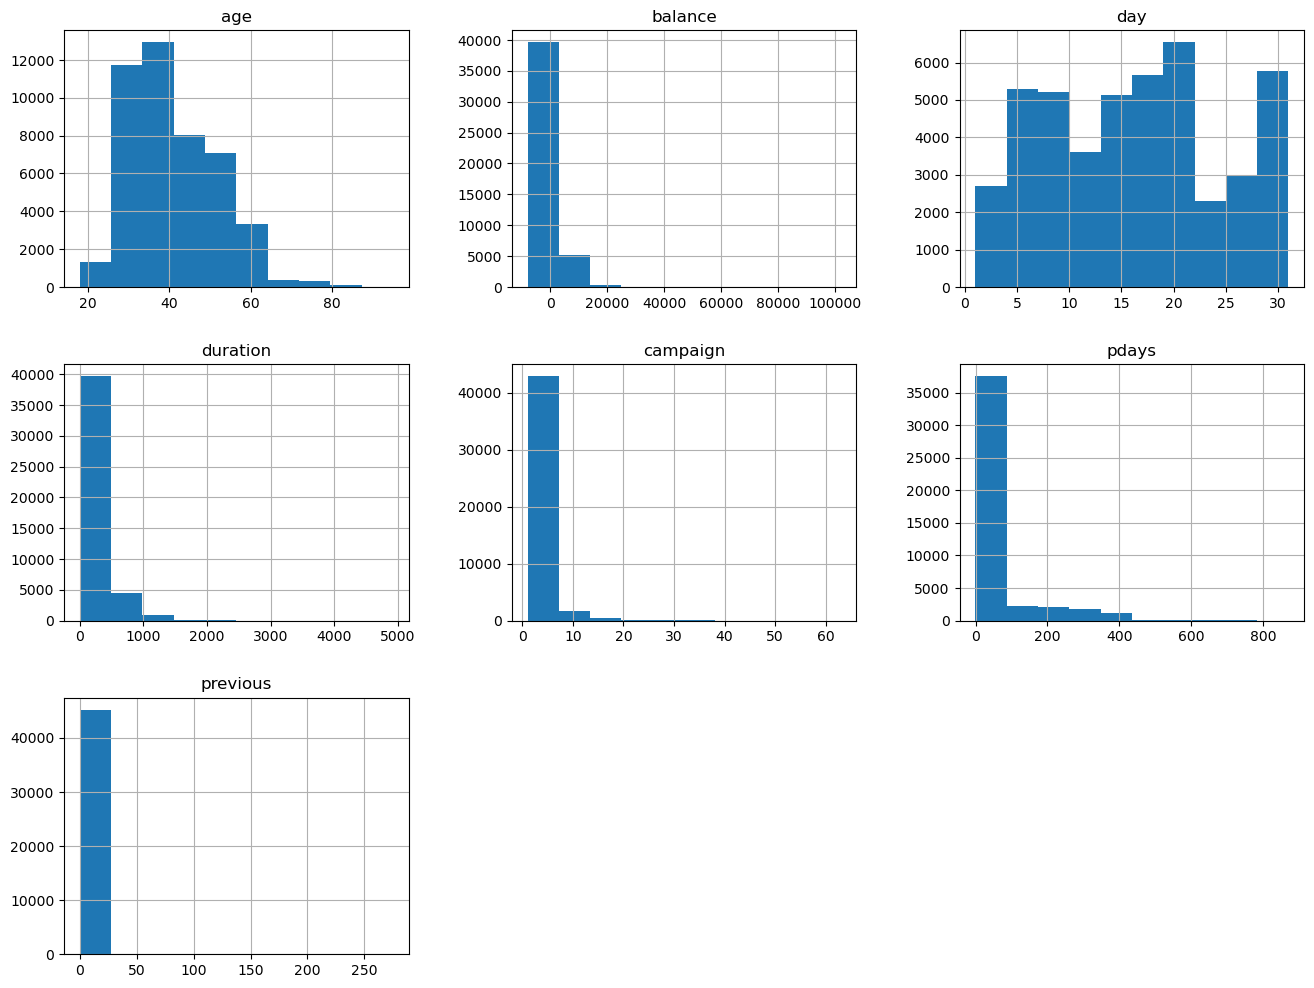

In [26]:
# code here
rcParams['figure.figsize'] = 16,12
plots = df.hist()

Use heatmap to display the numerical features' correlation

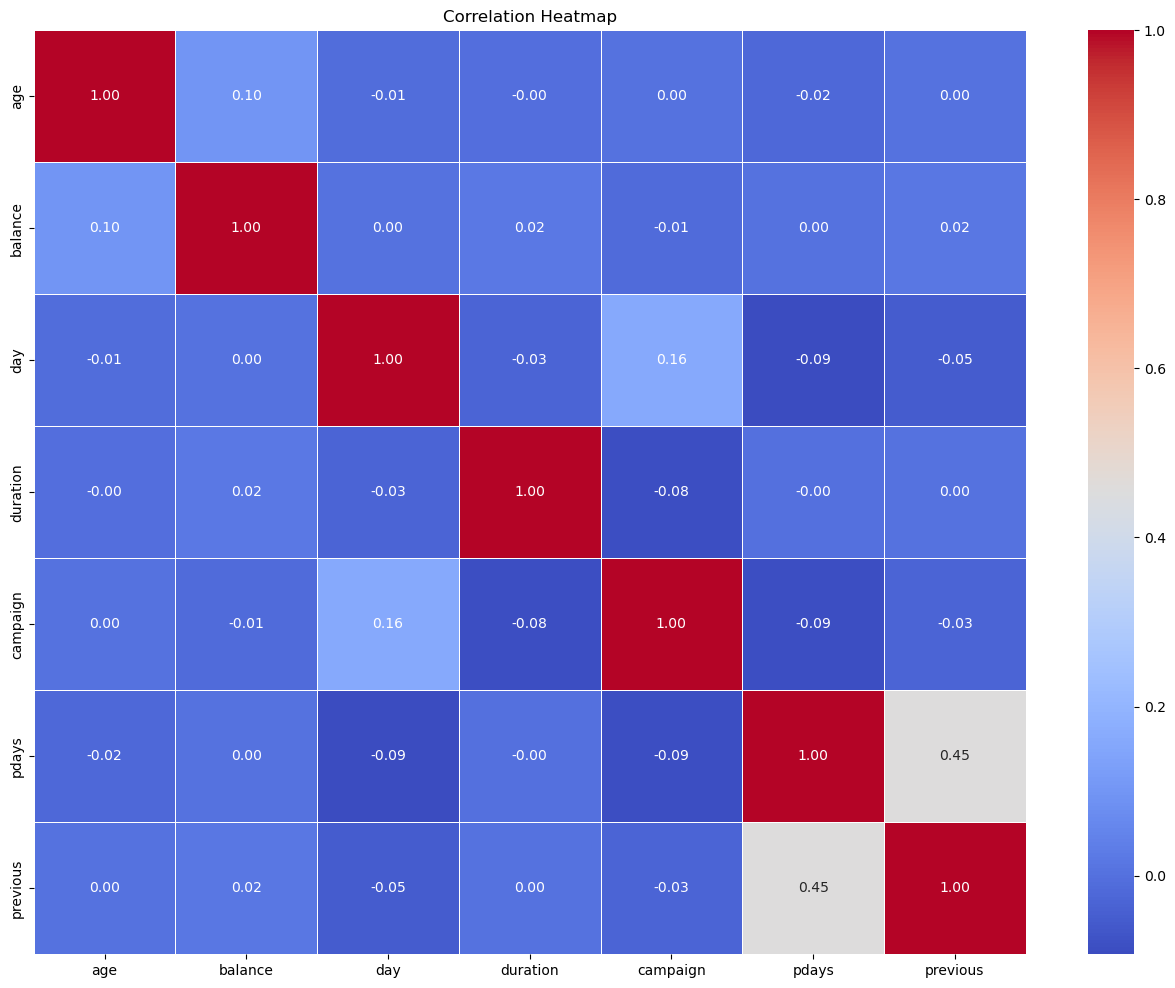

In [27]:
# code here
#Some correlate with target, others not
# Step 1: Select only numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# If you want to include encoded categorical features, you can use one-hot encoding:
# encoded_df = pd.get_dummies(df, drop_first=True)
# numerical_df = encoded_df.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate the correlation matrix
corr = numerical_df.corr()

# Step 3: Plot the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the propoer hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe is good, maybe is wrong. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [29]:
#code here
dayoftheyear=None
# Convert the 'day' and 'month' columns to a date using a placeholder year (2020)
df['date'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-2020', format='%d-%b-%Y')

# Extract the day of the year
df['dayoftheyear'] = df['date'].dt.dayofyear

# Drop the original 'day', 'month', and the temporary 'date' columns
df = df.drop(columns=['day', 'month', 'date'])

# Display the first few rows of the updated DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,126
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,126
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,126


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. Now sort the features into categorical and numerical features

In [30]:
categorical_features = ['job','marital','education','default','housing','loan','contact','poutcome'] # to be completed
numerical_features = ['age','balance','duration','campaign','pdays','dayoftheyear'] # to be completed

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

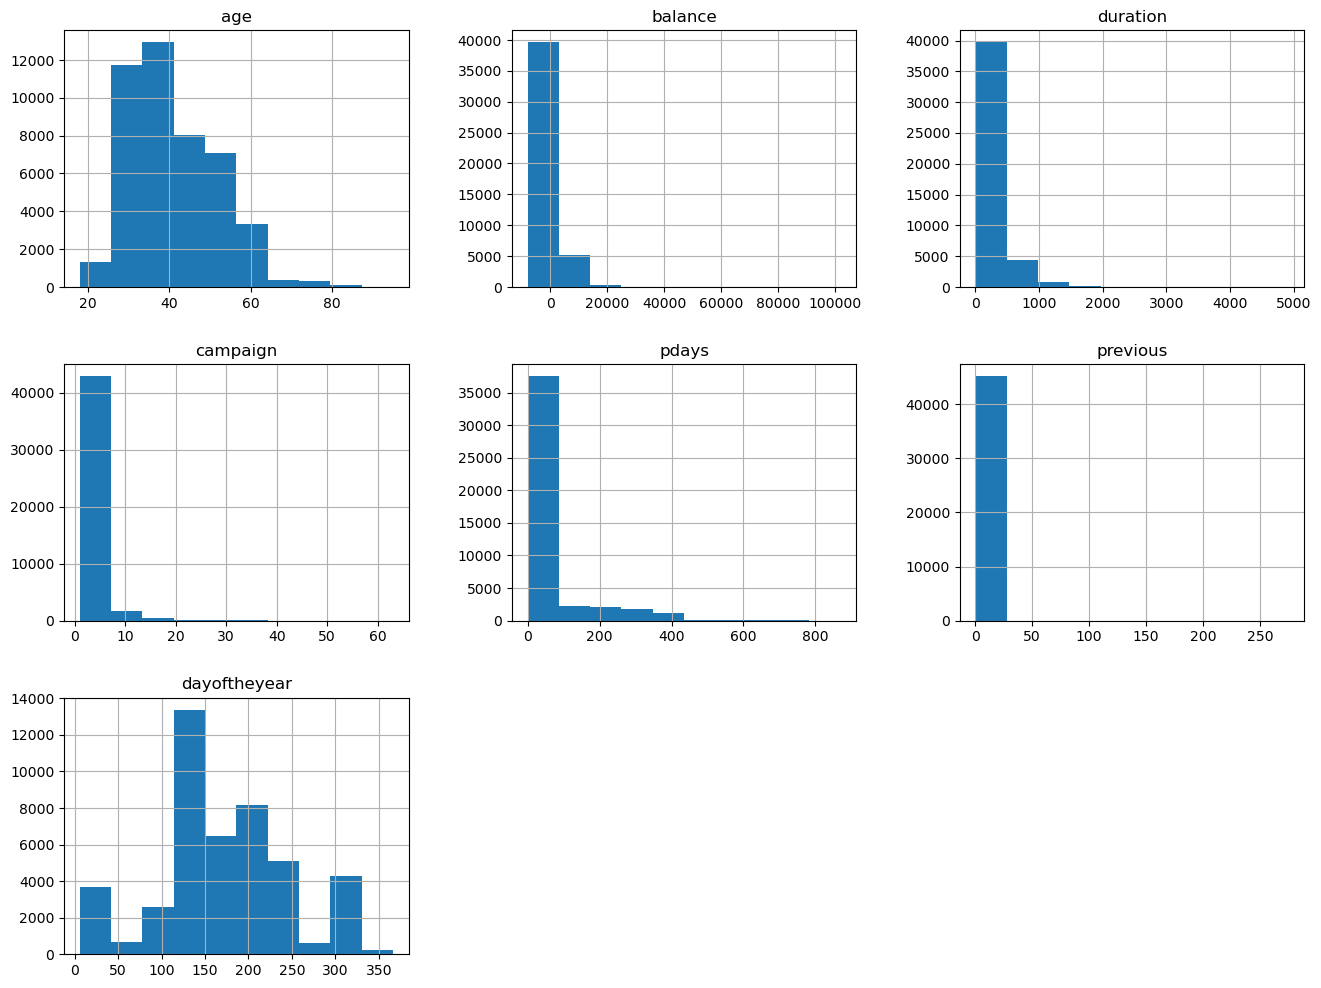

In [31]:
df_encoded = pd.get_dummies(df, columns=categorical_features)
rcParams['figure.figsize'] = 16,12
plots = df.hist()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Create the X and y DataFrames resample the dataframes if necessary
y = df_encoded['y']
X = df_encoded.drop('y', axis=1)
# train_test split
# X_train, X_test, y_train, y_test = None


#Split with a 30% test set, we stratify so that we have the same rate of positives
#in the training and test sets (as well as the same sex ratio, it will be useful at the end of the notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 41, 
                                                    test_size = 0.3)



In [33]:
# import and create the appropriate transformers 

#Scaling continuous variables

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [34]:
# code here
y
X

,age,balance,duration,campaign,pdays,previous,dayoftheyear,job_admin.,job_blue-collar,job_entrepreneur,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,126,False,False,False,...,True,True,False,False,False,True,False,False,False,True
1,44,29,151,1,-1,0,126,False,False,False,...,True,True,False,False,False,True,False,False,False,True
2,33,2,76,1,-1,0,126,False,False,True,...,True,False,True,False,False,True,False,False,False,True
3,47,1506,92,1,-1,0,126,False,True,False,...,True,True,False,False,False,True,False,False,False,True
4,33,1,198,1,-1,0,126,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,322,False,False,False,...,False,True,False,True,False,False,False,False,False,True
45207,71,1729,456,2,-1,0,322,False,False,False,...,False,True,False,True,False,False,False,False,False,True
45208,72,5715,1127,5,184,3,322,False,False,False,...,False,True,False,True,False,False,False,False,True,False
45209,57,668,508,4,-1,0,322,False,True,False,...,False,True,False,False,True,False,False,False,False,True


Well done! The data is now ready to be splitted into sets and used to train models!

Hop hop hop!!! Not to fast!! You processed the data for machine learning, but are all the data useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [35]:
# remove duration column
X.drop('duration',axis=1)

,age,balance,campaign,pdays,previous,dayoftheyear,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,-1,0,126,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
1,44,29,1,-1,0,126,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
2,33,2,1,-1,0,126,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
3,47,1506,1,-1,0,126,False,True,False,False,...,True,True,False,False,False,True,False,False,False,True
4,33,1,1,-1,0,126,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,3,-1,0,322,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
45207,71,1729,2,-1,0,322,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
45208,72,5715,5,184,3,322,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
45209,57,668,4,-1,0,322,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True


## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

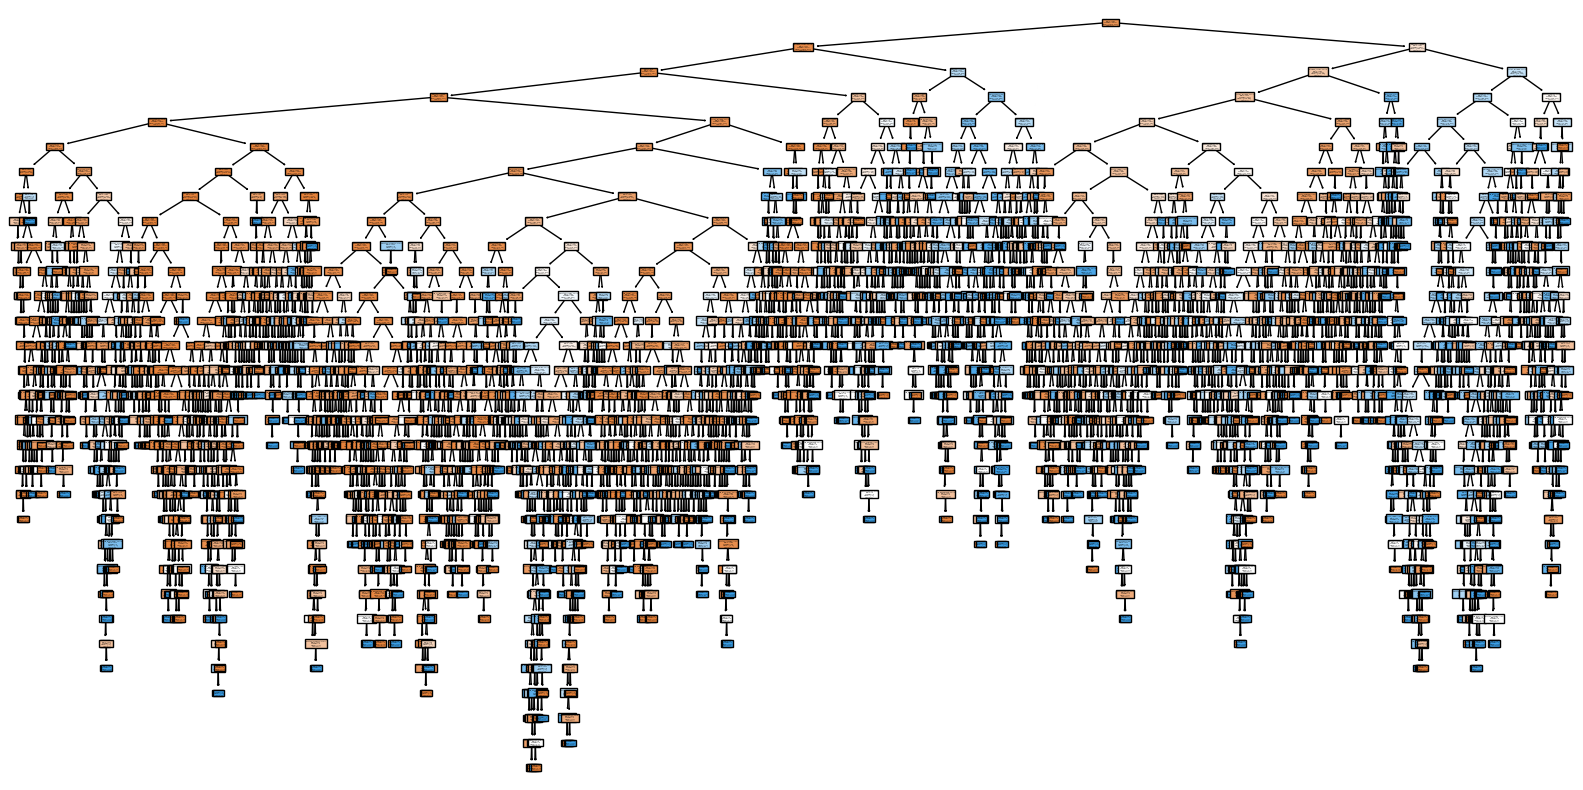

In [36]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
# Decision tree model creation and tree visualization

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(model, filled=True, feature_names=feature_names, class_names=model.classes_.tolist())
plt.show()

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

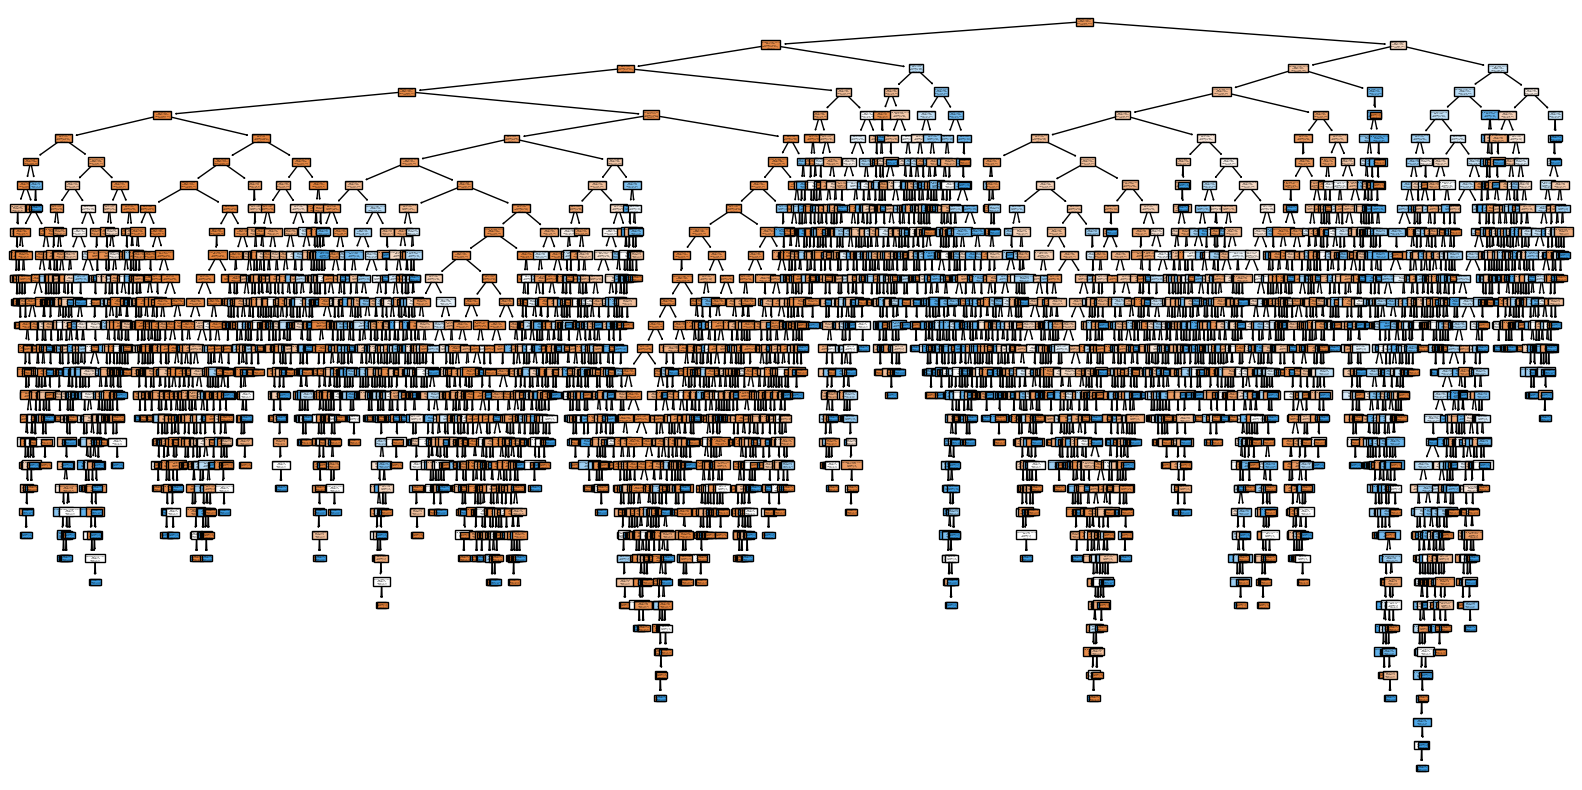

In [37]:
# create a new train and test dataset with a different seed
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Example data
# X and y should be defined here
# X, y = ...

# Create a new train and test dataset with a different seed
new_seed = 123  # Choose a different seed value
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=new_seed)

# Create and train the decision tree model
model_new = DecisionTreeClassifier()
model_new.fit(X_train_new, y_train_new)

# Convert feature names to a list
feature_names_new = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(model_new, filled=True, feature_names=feature_names_new, class_names=model_new.classes_.tolist())
plt.show()

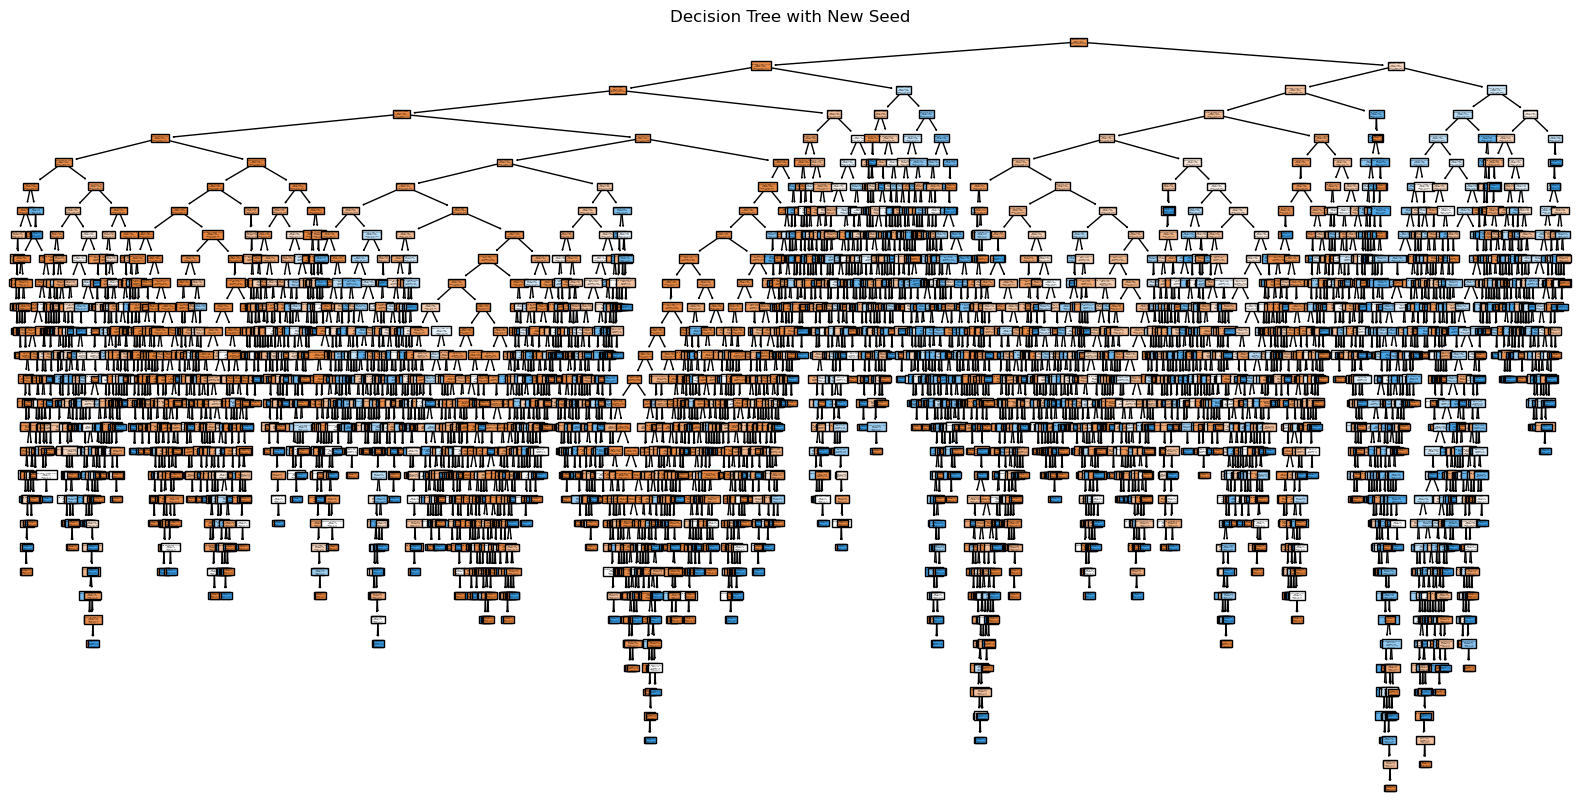

In [38]:
# Second tree creation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Example data (make sure X and y are defined)
# X, y = ...

# Create a new train and test dataset with a different seed
new_seed = 123  # Choose a different seed value
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=new_seed)

# Create and train the second decision tree model
model_new = DecisionTreeClassifier(random_state=new_seed)  # Set random_state for reproducibility
model_new.fit(X_train_new, y_train_new)

# Convert feature names to a list
feature_names_new = X.columns.tolist()

# Plot the second decision tree
plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(model_new, filled=True, feature_names=feature_names_new, class_names=model_new.classes_.tolist())
plt.title('Decision Tree with New Seed')
plt.show()

What can you tell about the two trees?

*answer here*

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [39]:
# Cross validation on Decision trees
score_list = []
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Example data (make sure X and y are defined)
# X, y = ...

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
# 5-fold cross-validation as an example
score_list = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the scores for each fold
print("Cross-validation scores for each fold:", score_list)

# Print the mean score across all folds
print("Mean cross-validation score:", score_list.mean())

Cross-validation scores for each fold: [0.82892845 0.51968591 0.64299934 0.52034948 0.29949126]
Mean cross-validation score: 0.5622908885544582


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Plot your metrics performance

In [41]:
# performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric
import matplotlib.pyplot as plt
import numpy as np

# Example Data
metrics = results_df['Metric']
means = results_df['Mean']
stds = results_df['Std']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, means, yerr=stds, capsize=10, color='skyblue', alpha=0.7)

# Add titles and labels
plt.title('Cross-Validation Metrics: Mean and Standard Deviation')
plt.ylabel('Score')
plt.xlabel('Metric')

# Show the plot
plt.show()

NameError: name 'results_df' is not defined

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [43]:
# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Example data (make sure X and y are defined)
# X, y = ...

# Define the parameter grid specifically for max_depth
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 15, 20, 25, 30]  # Varying max_depth values
}

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

ModuleNotFoundError: No module named 'joblib.externals.loky.backend.fork_exec'

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics
# Retrain the model with the best hyperparameters
best_max_depth = 10  # Replace with the actual best max_depth from your grid search

# Initialize the Decision Tree model with the best parameters
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Train the final model on the entire training set
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Test Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=df_encoded.y, yticklabels=df.y)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=df_encoded.y))

Test Set Metrics:
Accuracy: 0.8934
Precision: 0.8843
Recall: 0.8934
F1 Score: 0.8878


What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [ ]:
# train_test split (you can copy paste the previously declared cell)
# X_train, X_test, y_train, y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# gridsearch for the Random Forest classifier
## Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for 'n_estimators' and 'max_depth'
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Use the best parameters to train the model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   3.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   3.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   3.5s
[CV] END ....................max_depth=None, n_estimators=50; total time=   3.7s
[CV] END ....................max_depth=None, n_estimators=50; total time=   3.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   6.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   6.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=   6.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   6.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=   6.8s
[CV] END ......................max_depth=10, n_e

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

*answer here*

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming best_params from previous GridSearchCV is available
best_params = {'n_estimators': 100, 'max_depth': 30}  # Example values

# Retrain the model with the best hyperparameters on the entire training set
best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 random_state=42)

best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = best_rf.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# (Optional) You can also use other metrics like confusion matrix, ROC-AUC, etc., if needed.


Test Set Accuracy: 0.9010
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.65      0.39      0.49      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

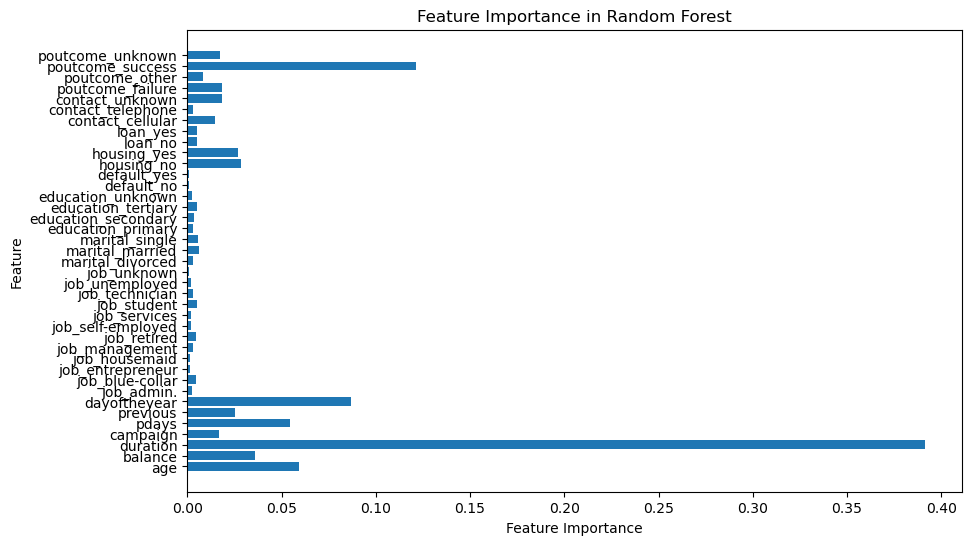

In [ ]:
# training and display features' importance.
# tell them to use the RandomForest Object
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X, y)

# Extract feature importances
importances = rf_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

What is the most important feature?

*Answer here*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

Optimal number of features: 2


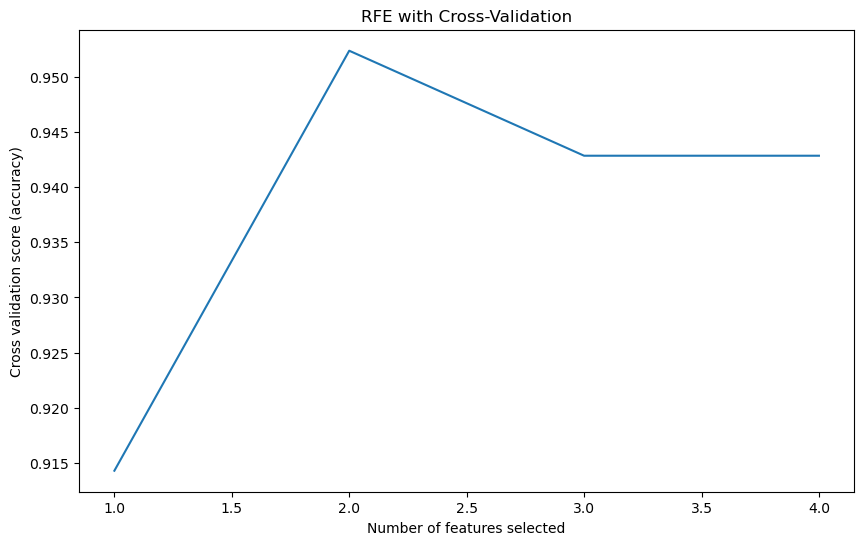

Test Set Accuracy after RFE: 1.0000
Classification Report after RFE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Selected Features: ['petal length (cm)' 'petal width (cm)']


In [ ]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Perform RFE with cross-validation
rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Plot number of features vs cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title('RFE with Cross-Validation')
plt.show()

# Select the best features
X_train_rfe = rfecv.transform(X_train)
X_test_rfe = rfecv.transform(X_test)

# Retrain the model on the selected features
rf_model.fit(X_train_rfe, y_train)

# Evaluate on the test set
y_test_pred = rf_model.predict(X_test_rfe)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy after RFE: {test_accuracy:.4f}")

# Generate a classification report
print("Classification Report after RFE:\n", classification_report(y_test, y_test_pred))

# (Optional) Get the support mask for selected features
selected_features = np.array(feature_names)[rfecv.support_]
print("Selected Features:", selected_features)

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [ ]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# (Optional) Grid Search for Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found
print(f"Best parameters found: {grid_search.best_params_}")

# Retrain the model with the best parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Evaluate the optimized model on the test set
y_test_pred_optimized = best_xgb_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_test_pred_optimized)
print(f"Test Set Accuracy after Grid Search: {optimized_accuracy:.4f}")
print("Classification Report after Grid Search:\n", classification_report(y_test, y_test_pred_optimized))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['no' 'yes']

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [ ]:
# model building and evaluation

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

In [ ]:
# performance curves

## Let's Conclude

Report your test set metrics for the three methods here

In [ ]:
# Decision Tree on test set

In [ ]:
# Random forest on test set

In [ ]:
# XGBoost on test set

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here